<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

In [63]:
!pip install bs4

  Using cached https://files.pythonhosted.org/packages/10/ed/7e8b97591f6f456174139ec089c769f89a94a1a4025fe967691de971f314/bs4-0.0.1.tar.gz
  Created wheel for bs4: filename=bs4-0.0.1-cp37-none-any.whl size=1278 sha256=408ffe081b05c45207b711dd71facab98e36cffeb88418f95328851b5beb2626
  Stored in directory: C:\Users\WIN 10\AppData\Local\pip\Cache\wheels\a0\b0\b2\4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4


## 1) *Optional:* Scrape 100 Job Listings that contain the title "Data Scientist" from indeed.com

At a minimum your final dataframe of job listings should contain
- Job Title
- Job Description

If you choose to not to scrape the data, there is a CSV with outdated data in the directory. Remeber, if you scrape Indeed, you're helping yourself find a job. ;)

In [266]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd

job_df = pd.DataFrame([], columns=['title',"description"])

def job_info(url):
    """Scrapes data from individual job posts"""
    html_doc = requests.get(url)
    soup = bs(html_doc.content, 'html.parser')
    all_content = soup.find('div',class_='jobsearch-ViewJobLayout-jobDisplay icl-Grid-col icl-u-xs-span12 icl-u-lg-span7')
    try:
        title = all_content.find('h3').text.strip()
    except:
        title = np.NaN
    try:
        description = all_content.find('div',class_='jobsearch-jobDescriptionText').text.strip()
    except:
        description = np.NaN
    df = pd.DataFrame({'title':[title],'description':[description]})
    return(df)

In [267]:
def job_links(url):
    """Collects the links for all the listing on a search results page."""
    html_doc = requests.get(url)
    soup = bs(html_doc.content, 'html.parser')
    all_content = soup.find_all('div',class_='title')
    link_list = []
    for i in all_content:
        link = i.find('a', class_='jobtitle')['href']
        link_list.append(f"https://www.indeed.com{link}")
 
    return(link_list)

In [268]:
a = job_links('https://www.indeed.com/jobs?q=data+scientist&l=seattle&start=0')


In [269]:
job_df = pd.DataFrame([], columns=['title',"description"])
for i in range(0,100,10):
    #takes the indeed search link with the search parameters and iterates over the first 9 pages of results
    #Note: q= the search query l= the location start= page number. Example: page 1 is 0, page 2 is 10, page 3 is 20
    url = 'https://www.indeed.com/jobs?q=data+scientist&l=seattle&start='+str(i)
    print(url)
    jobs = job_links(url)
    for job in jobs:
        df = job_info(job)
        job_df = job_df.append(df)

https://www.indeed.com/jobs?q=data+scientist&l=seattle&start=0
https://www.indeed.com/jobs?q=data+scientist&l=seattle&start=10
https://www.indeed.com/jobs?q=data+scientist&l=seattle&start=20
https://www.indeed.com/jobs?q=data+scientist&l=seattle&start=30
https://www.indeed.com/jobs?q=data+scientist&l=seattle&start=40
https://www.indeed.com/jobs?q=data+scientist&l=seattle&start=50
https://www.indeed.com/jobs?q=data+scientist&l=seattle&start=60
https://www.indeed.com/jobs?q=data+scientist&l=seattle&start=70
https://www.indeed.com/jobs?q=data+scientist&l=seattle&start=80
https://www.indeed.com/jobs?q=data+scientist&l=seattle&start=90


In [270]:
job_df = job_df.reset_index().drop(['index'],axis=1)

In [271]:
job_df.tail()

,title,description
158,Statistician,At Weyerhaeuser we believe trees are a remarka...
159,Senior Data Scientist,"Porch is looking for an accomplished, hands-on..."
160,Senior Data Analyst,Job Posting Title\nSenior Data Analyst\nSummar...
161,Lead Data Scientist,"Porch is looking for an accomplished, hands-on..."
162,Data Scientist/Machine Learning Engineer,We are looking for a Sr Data Scientist to help...


In [245]:
job_df.shape

(168, 2)

## 2) Use Spacy to tokenize / clean the listings 

In [52]:
##### Your Code Here #####
df1 = pd.read_csv('data/job_listings.csv')


In [10]:
df.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [11]:
df.shape

(426, 3)

In [247]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [272]:
df = job_df

In [273]:
df.columns

Index(['title', 'description'], dtype='object')

In [274]:
df = df.dropna()

In [275]:
tokens = []

for doc in tokenizer.pipe(df.description, batch_size=500):
    doc_tokens = []
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())
    tokens.append(doc_tokens)

In [280]:
df['tokens'] = tokens
df.head()

C:\Users\WIN 10\Anaconda3\envs\unit-4\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,title,description,tokens
0,Data Scientist/Machine Learning Engineer,We are looking for a Sr Data Scientist to help...,"[looking, sr, data, scientist, help, develop, ..."
2,Data Scientist / BI Developer (Remote),XLFN Consulting provides large organizations w...,"[xlfn, consulting, provides, large, organizati..."
3,Database Engineer / Data Scientist,As part of a leading IT managed services speci...,"[leading, managed, services, specialist, 12,00..."
4,Data Scientist,Ring is looking for a Data Scientist to join a...,"[ring, looking, data, scientist, join, new, pr..."
5,Data Scientist,About Mason\n\nMason is a high-growth venture ...,"[mason, \n\n, mason, high-growth, venture, bac..."


In [281]:
import squarify
import matplotlib.pyplot as plt
from collections import Counter

def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [297]:
stopwords = nlp.Defaults.stop_words.union([' ','','\n\n','\n'])

In [298]:
def make_token(df, column):
    tokens = []
    for doc in tokenizer.pipe(df[column], batch_size=500):
        doc_tokens = []
        for token in doc:
            if token.text.lower() not in stopwords:
                doc_tokens.append(token.text.lower())

        tokens.append(doc_tokens)

    df['tokens'] = tokens
    wc = count(df['tokens'])
    wc_top20 = wc[wc['rank'] <= 20]
    s = squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)

C:\Users\WIN 10\Anaconda3\envs\unit-4\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


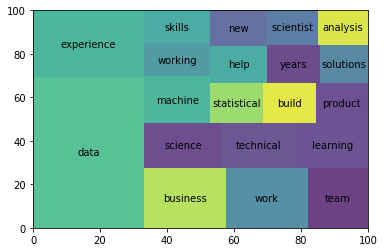

In [299]:
make_token(df,'description')

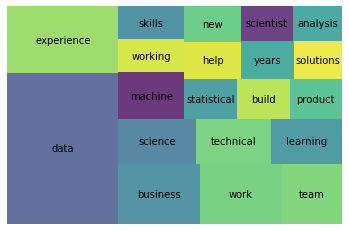

In [300]:
wc = count(df['tokens'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [301]:
wc_top20

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
1,data,157,1371,1.0,0.026153,0.026153,0.987421
63,experience,146,612,2.0,0.011674,0.037827,0.918239
391,business,118,401,3.0,0.007649,0.045476,0.742138
113,work,135,400,4.0,0.007630,0.053106,0.849057
722,team,110,296,5.0,0.005646,0.058753,0.691824
116,science,102,283,6.0,0.005398,0.064151,0.641509
226,technical,86,275,7.0,0.005246,0.069397,0.540881
446,learning,96,261,8.0,0.004979,0.074376,0.603774
503,machine,100,253,9.0,0.004826,0.079202,0.628931
168,working,103,180,10.0,0.003434,0.082635,0.647799


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [302]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

import spacy
from sklearn.feature_extraction.text import CountVectorizer

# list of text documents
text = df.description.values

# create the transformer
vect = CountVectorizer()

# tokenize and build vocab
vect.fit(text)

# transform text
dtm = vect.transform(text)

In [303]:
vect = CountVectorizer(stop_words='english')
# Use custom Spacy Vectorizer
dtm = vect.fit(text)
dtm = vect.transform(text)

# BBC articles in `data` variable 
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

In [304]:
dtm.head()

,00,000,01,03,0660,07,10,100,1000,10x,...,yield,york,young,youtube,yy,zacharypiper,zillow,zoom,zulily,zuniversity
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

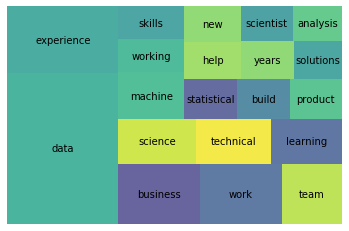

In [305]:
wc = count(df['tokens'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [306]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

tfidf = TfidfVectorizer(tokenizer=tokenize, min_df=0.025, max_df=.98, ngram_range=(1,2))

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(text) # Similiar to fit_predict

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,,,1,10,2,3,4,5,6,7,...,’ beginning,’ team,’ welcome,’s,’s degree,’s goal,’s large,’s pottery,’s skill,™
0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000
1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000
2,0.392202,0.0,0.0,0.0,0.0,0.056610,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.02881,0.055571,0.0,0.0,0.0,0.0,0.146845
3,0.410843,0.0,0.0,0.0,0.0,0.114366,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000
4,0.471112,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000


In [307]:
from sklearn.metrics.pairwise import cosine_similarity

dist_matrix  = cosine_similarity(dtm)
df = pd.DataFrame(dist_matrix)

df.shape

(159, 159)

In [313]:
df[5].sort_values(ascending=False)[:10]

5      1.000000
83     0.280249
82     0.278131
37     0.261511
56     0.260976
21     0.256268
87     0.245946
22     0.244808
144    0.239572
115    0.230203
Name: 5, dtype: float64

In [314]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,149,150,151,152,153,154,155,156,157,158
0,1.000000,0.038308,0.024459,0.025979,0.024303,0.063238,0.024303,0.032966,0.049145,0.032548,...,0.041457,0.037294,0.014302,0.026946,0.008753,0.011808,0.022118,0.014258,0.024054,1.000000
1,0.038308,1.000000,0.120914,0.100520,0.072820,0.082545,0.072820,0.060879,0.124983,0.071371,...,0.100925,0.122985,0.062374,0.082948,0.049868,0.042211,0.061323,0.050041,0.060501,0.038308
2,0.024459,0.120914,1.000000,0.287240,0.272961,0.192529,0.272961,0.150081,0.264884,0.039610,...,0.187862,0.318554,0.200950,0.141269,0.049101,0.172773,0.061486,0.231826,0.075626,0.024459
3,0.025979,0.100520,0.287240,1.000000,0.345731,0.212489,0.345731,0.227959,0.272679,0.121380,...,0.280082,0.356869,0.297201,0.255688,0.083504,0.242393,0.159268,0.274659,0.158520,0.025979
4,0.024303,0.072820,0.272961,0.345731,1.000000,0.185037,1.000000,0.198885,0.291171,0.061120,...,0.260450,0.262285,0.255432,0.196680,0.059806,0.203202,0.079119,0.268248,0.088733,0.024303


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [315]:
from sklearn.neighbors import NearestNeighbors

# Fit on TF-IDF Vectors
nn  = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [322]:
nn.kneighbors([dtm.iloc[5]])

(array([[0.        , 1.19979242, 1.20155682, 1.21530979, 1.21574991]]),
 array([[ 5, 83, 82, 37, 56]], dtype=int64))

In [324]:
job_df.description[5][:400]

'About Mason\n\nMason is a high-growth venture backed startup based in Seattle, Washington.\n\nMason is transforming mobile deployments the same way AWS transformed web app development, making it easy for companies to deploy their software on single-use Android devices anywhere in the world.\n\nOur customers range from public companies deploying patient engagement software on 22” devices in hospitals, to'

In [325]:
job_df.description[82][:400]

'We are looking for a Sr Data Scientist to help develop digital marketing solutions for us. You should be strong in developing Data Algorithms as well as data pipelines to make recommendations about content delivery. If this sounds interesting to you, please apply ASAP and we will get back to you immediately.Job Type: Full-time'

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 